## Covid-19 Project

## Inital Hypothesis
Here I made some assumption based on data understanding

# Hypothesis 1
- Logistic regression is going to work better than other algorithms for this dataset

In [ ]:
# imported Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/corona_tested_006.csv")

<ipython-input-174-ef618809613b>:1: DtypeWarning:

Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.shape

(278848, 11)

In [ ]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
df[df.isnull().sum(axis=1)>=1]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


In [ ]:
df.isin(["None"]).mean()*100

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  0.000000
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64

In [ ]:
df[df.isin(["None"]).sum(axis=1)>=1].count()[0]

140676

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df["Test_date"]=pd.to_datetime(df["Test_date"])

<ipython-input-183-0b5d0bafa63e>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278848 non-null  object        
 3   Fever                278848 non-null  object        
 4   Sore_throat          278848 non-null  object        
 5   Shortness_of_breath  278848 non-null  object        
 6   Headache             278848 non-null  object        
 7   Corona               278848 non-null  object        
 8   Age_60_above         278848 non-null  object        
 9   Sex                  278848 non-null  object        
 10  Known_contact        278848 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


In [ ]:
df.duplicated().sum()

0

## Data Cleaning
          -Cough_symptoms column has some values false,true instead of False,true
          -many columns has their null values replaced with some other value
           (like-other,None)

In [ ]:
df["Cough_symptoms"].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [ ]:
d = {"FALSE":False,"TRUE":True}
df["Cough_symptoms"]=df["Cough_symptoms"].replace(d.keys(),d.values())

In [ ]:
df["Cough_symptoms"].value_counts()

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

In [ ]:
df["Cough_symptoms"].value_counts()

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

In [ ]:
def rep_tf(df,i):
    d = {"FALSE":False,"TRUE":True}
    df[i]=df[i].replace(d.keys(),d.values())
    #df[i]=df[i].str.strip()

    return df



In [ ]:
for i in df.select_dtypes(include = ["object"]).columns:
    rep_tf(df,i)

In [ ]:
df["Fever"].value_counts()

False    256844
True      21752
None        252
Name: Fever, dtype: int64

In [ ]:
df["Sore_throat"].value_counts()

False    276921
True       1926
None          1
Name: Sore_throat, dtype: int64

In [ ]:
df["Shortness_of_breath"].value_counts()

False    277270
True       1577
None          1
Name: Shortness_of_breath, dtype: int64

In [ ]:
df["Headache"].value_counts()

False    276433
True       2414
None          1
Name: Headache, dtype: int64

<Axes: >

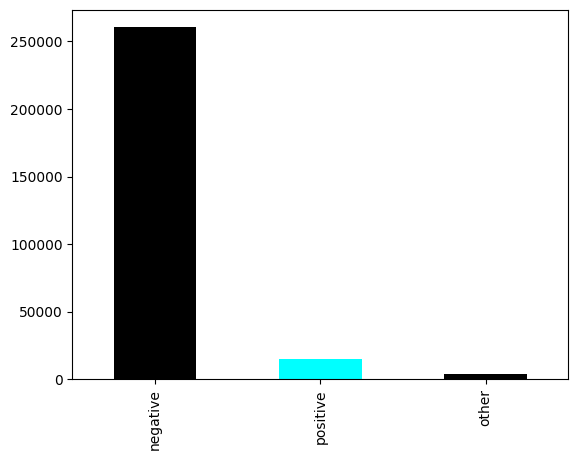

In [ ]:
#case of unbiased classification
df["Corona"].value_counts().plot(kind = "bar",color = ["black","cyan"])

In [ ]:
df["Age_60_above"].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
df["Sex"].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

<Axes: >

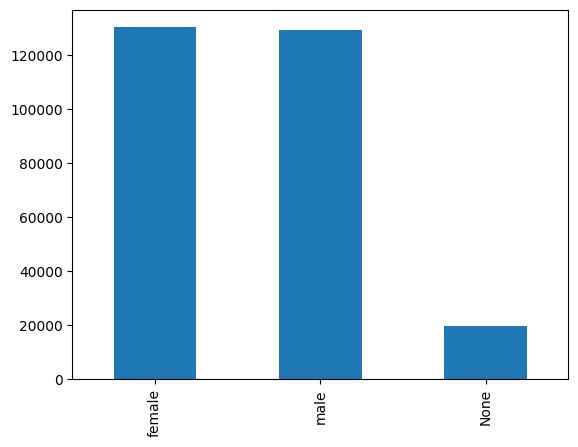

In [ ]:
df["Sex"].value_counts().plot(kind="bar")

In [ ]:
df["Known_contact"].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

## EDA

In [ ]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

### cough symptoms

In [ ]:
df["Cough_symptoms"].value_counts()

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

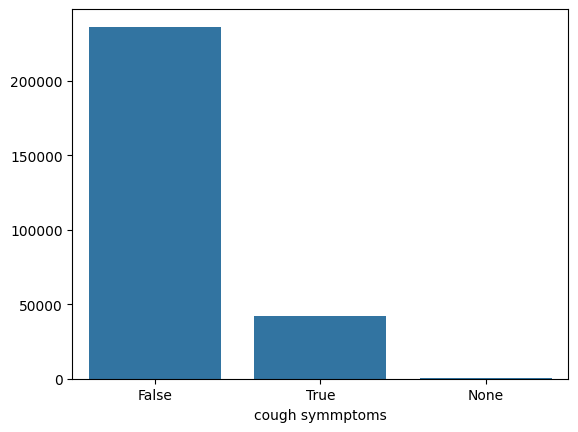

In [ ]:
sns.barplot(x = df["Cough_symptoms"].value_counts().index,y=df["Cough_symptoms"].value_counts().values)
plt.xlabel("cough symmptoms")
plt.show()

## Finds-
        -Around 42k poeple have cough symptoms while a larger amount of population dont have it
        -There are many missing values,labeled as none

In [ ]:
df[df["Cough_symptoms"]==True]["Corona"].value_counts()

negative    34987
positive     6584
other         657
Name: Corona, dtype: int64

In [ ]:
df[df["Cough_symptoms"]==False]["Corona"].value_counts()

negative    225021
positive      8112
other         3235
Name: Corona, dtype: int64

In [ ]:
df[df["Cough_symptoms"]=="None"]["Corona"].value_counts()

negative    219
positive     33
Name: Corona, dtype: int64

In [ ]:
df[df["Cough_symptoms"]=="None"]["Corona"].value_counts()

negative    219
positive     33
Name: Corona, dtype: int64

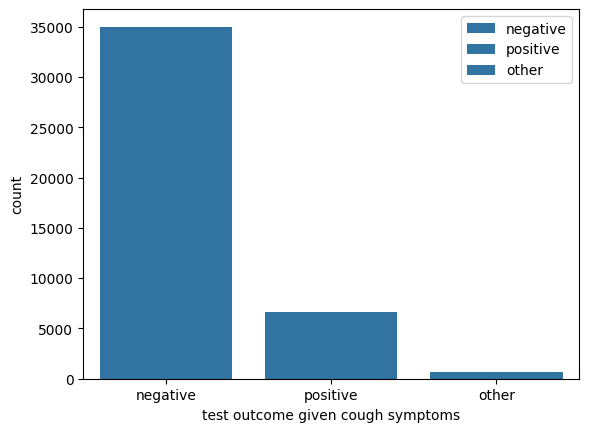

In [ ]:
sns.barplot(x=df[df["Cough_symptoms"]==True]["Corona"].value_counts().index,y=df[df["Cough_symptoms"]==True]["Corona"].value_counts().values,
           label = df["Corona"].value_counts().index[:])
plt.xlabel("test outcome given cough symptoms")
plt.ylabel("count")
plt.legend()

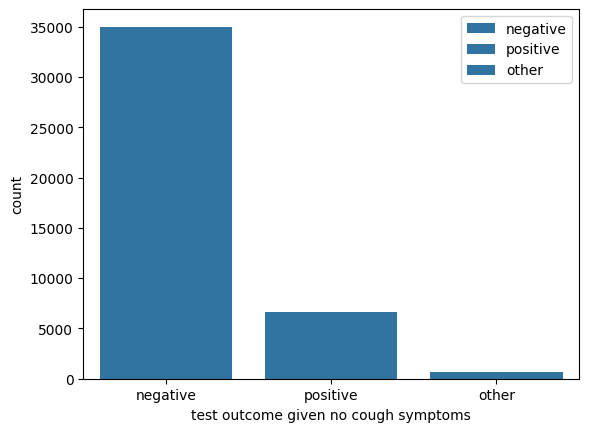

In [ ]:
sns.barplot(x=df[df["Cough_symptoms"]==False]["Corona"].value_counts().index,y=df[df["Cough_symptoms"]==True]["Corona"].value_counts().values,
           label = df["Corona"].value_counts().index[:])
plt.xlabel("test outcome given no cough symptoms")
plt.ylabel("count")
plt.legend()

df.groupby("corona")["Cough_symptoms"].value_counts("normalize").unstack()

# Find-
      -poeple are likely to have corona having cough symptoms than not and that too by a large margin.
      -a only 13 percent poeple have cough who are negative and if positive cough symptoms are more likely around 44%

In [ ]:
df[df["Cough_symptoms"]==True]["Fever"].value_counts()

False    26751
True     15475
None         2
Name: Fever, dtype: int64

In [ ]:
df[df["Cough_symptoms"]==False]["Fever"].value_counts()

False    230092
True       6276
Name: Fever, dtype: int64

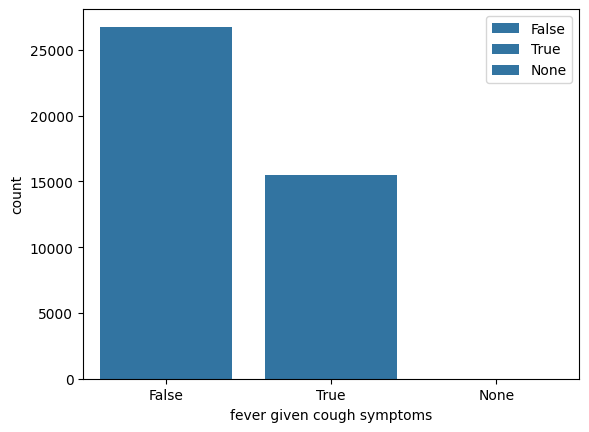

In [ ]:
sns.barplot(x=df[df["Cough_symptoms"]==True]["Fever"].value_counts().index,y=df[df["Cough_symptoms"]==True]["Fever"].value_counts().values,
           label = df["Fever"].value_counts().index[:])
plt.xlabel("fever given cough symptoms")
plt.ylabel("count")
plt.legend()

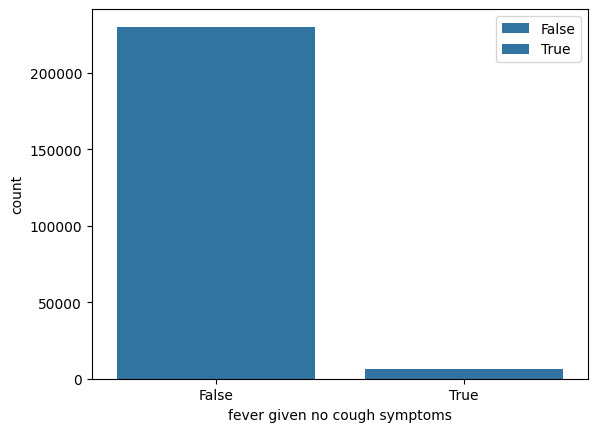

In [ ]:
sns.barplot(x=df[df["Cough_symptoms"]==False]["Fever"].value_counts().index,y=df[df["Cough_symptoms"]==False]["Fever"].value_counts().values,
           label = df["Fever"].value_counts().index[:-1])
plt.xlabel("fever given no cough symptoms")
plt.ylabel("count")
plt.legend()

In [ ]:
df.groupby("Corona")["Fever"].value_counts("normalize").unstack()

Fever,False,True,None
Corona,,,
negative,0.938381,0.060778,0.000842
other,0.903135,0.096865,NaN
positive,0.620341,0.377419,0.002240


<Axes: xlabel='Corona'>

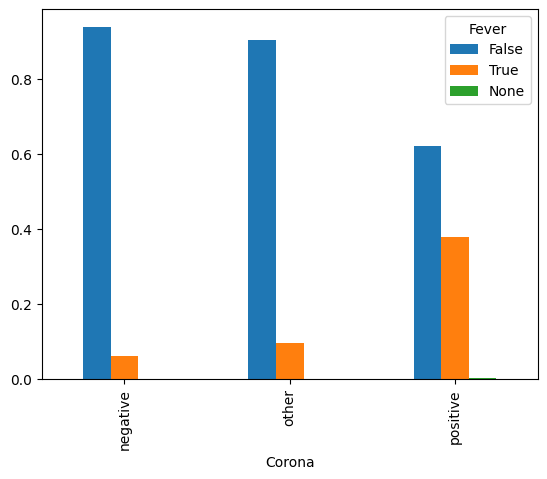

In [ ]:
df.groupby("Corona")["Fever"].value_counts("normalize").unstack().plot(kind = "bar")

# Find-
      -poeple are likely to have corona having Fever.
      -only 6 percent of people are having Fever provided no Covid
      whereas 37 percetn of covide positive have Fever

<Axes: >

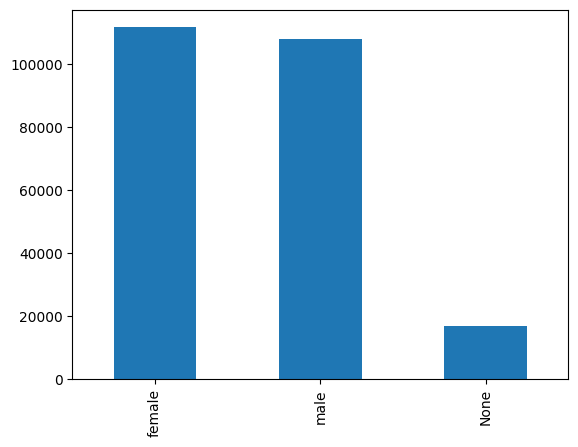

In [ ]:
df[df["Cough_symptoms"]==False]["Sex"].value_counts().plot(kind = "bar")

<Axes: >

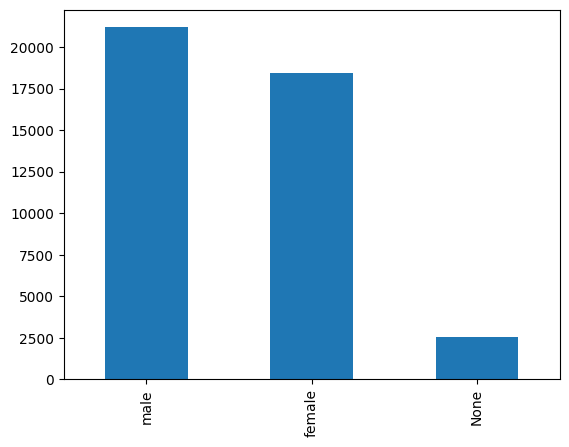

In [ ]:
df[df["Cough_symptoms"]==True]["Sex"].value_counts().plot(kind = "bar")

Text(0.5, 0, 'covid positive')

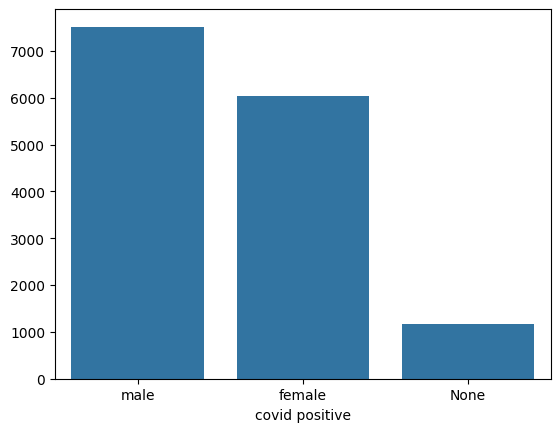

In [ ]:
sns.barplot(x=df[df["Corona"]=="positive"]["Sex"].value_counts().index,y=df[df["Corona"]=="positive"]["Sex"].value_counts().values)
plt.xlabel("covid positive")

In [ ]:
positive = df[(df["Corona"]=="positive") & (df["Sex"].isin(["female","male"]))]

pos = positive.groupby("Sex")["Corona"].count().reset_index() #.plot(kind="bar",color = ["black","red"])
px.bar(pos,x ="Sex",y = "Corona",text_auto=True,color = "Sex")
#plt.ylabel("covid positives")
#plt.show()


In [ ]:
df.groupby("Corona")["Sex"].value_counts("normalize").unstack()*100

Sex,None,female,male
Corona,,,
negative,6.869387,47.074285,46.056328
other,13.309353,41.546763,45.143885
positive,7.936723,41.014325,51.048951


In [ ]:
df.groupby("Sex")["Corona"].value_counts("normalize").unstack()*100

Corona,negative,other,positive
Sex,,,
None,91.376578,2.647856,5.975566
female,94.116382,1.242336,4.641282
male,92.816375,1.360676,5.822949


<Axes: xlabel='Corona'>

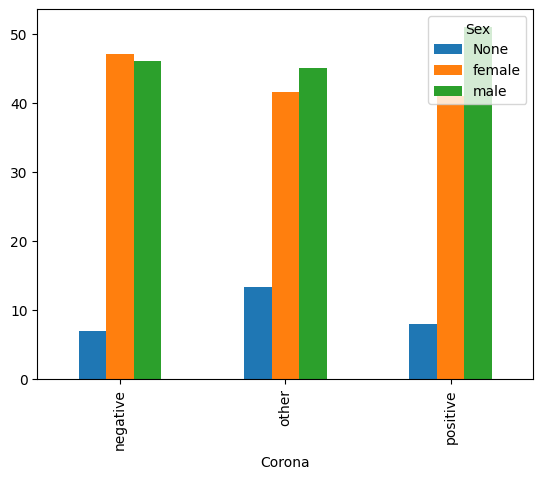

In [ ]:
(df.groupby("Corona")["Sex"].value_counts("normalize").unstack()*100).plot(kind = "bar")

# Find-
      -Males are more likely to be covid postive by a margin of six percent

In [ ]:
df.groupby("Cough_symptoms")["Sex"].value_counts("normalize").unstack()

Sex,None,female,male
Cough_symptoms,,,
False,0.071841,0.472006,0.456153
True,0.060884,0.437245,0.501871
None,0.043651,0.503968,0.452381


In [ ]:
df[df["Cough_symptoms"]==True]["Sex"].value_counts()[:-1]

male      21193
female    18464
Name: Sex, dtype: int64

In [ ]:
x = df[df["Cough_symptoms"]==True]["Sex"].value_counts()[:-1]
y = df["Sex"].value_counts()[:-1]
z = (x/y)*100
print(z)


female    14.185836
male      16.412524
Name: Sex, dtype: float64


<Axes: >

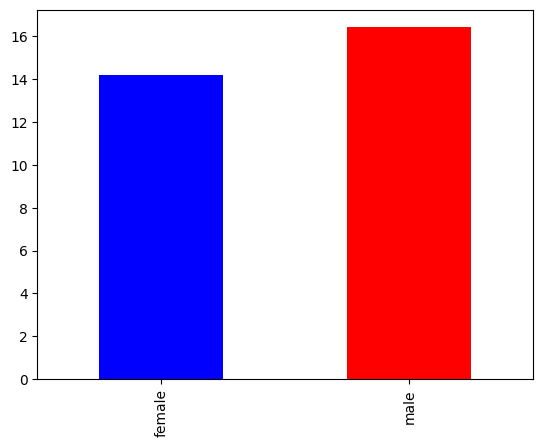

In [ ]:
z.plot(kind="bar",color = ["b","r"])

# Find-
      -Males have higher percentage of having fever symptoms

In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-11-03,True,False,True,False,False,negative,None,None,Abroad
1,2,2020-11-03,False,True,False,False,False,positive,None,None,Abroad
2,3,2020-11-03,False,True,False,False,False,positive,None,None,Abroad
3,4,2020-11-03,True,False,False,False,False,negative,None,None,Abroad
4,5,2020-11-03,True,False,False,False,False,negative,None,None,Contact with confirmed


### sore throat

Text(0.5, 0, 'covid result given sore throat')

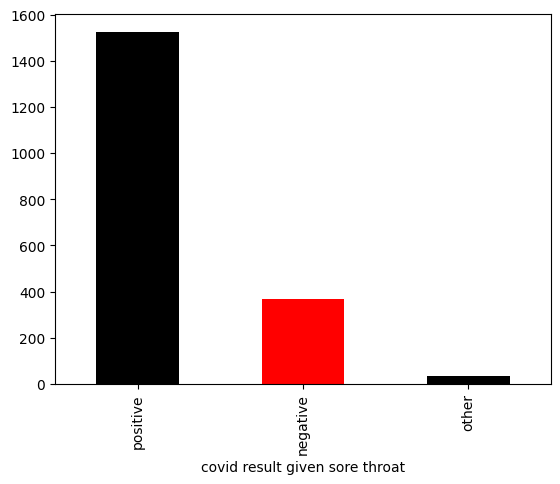

In [ ]:
df[df["Sore_throat"]==True]["Corona"].value_counts().plot(kind="bar",color = ["black","red"])
plt.xlabel("covid result given sore throat")

In [ ]:
#people having both sore_throat and cough symptoms
x = print(df[(df["Sore_throat"]==True) & (df["Cough_symptoms"]==True)].count()[0])
#people having only cough symptoms
y = print(df[(df["Sore_throat"]==False) & (df["Cough_symptoms"]==True)].count()[0])
#people having neither cough or sore
z = print(df[(df["Sore_throat"]==False) & (df["Cough_symptoms"]==False)].count()[0])

1249
40979
235695


### corona

<Axes: >

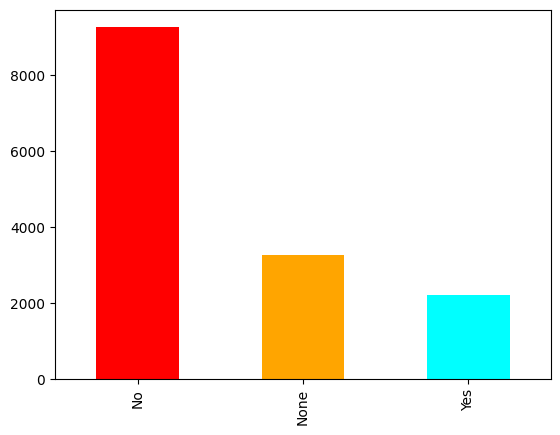

In [ ]:
df[df["Corona"]=="positive"]["Age_60_above"].value_counts().plot(kind ="bar",color = ["red","orange","cyan"])

<Axes: >

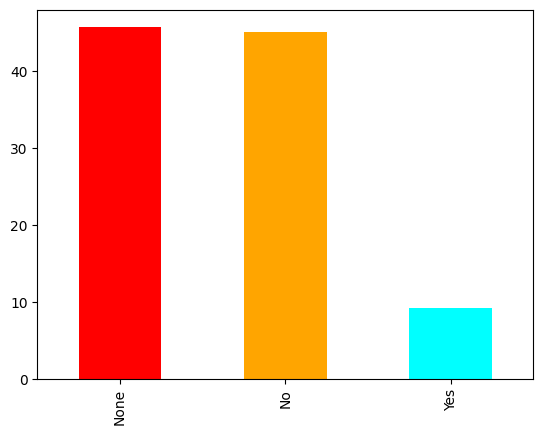

In [ ]:
(df["Age_60_above"].value_counts()*100/len(df["Age_60_above"])).plot(kind ="bar",color = ["red","orange","cyan"])

In [ ]:
positive = df[(df["Corona"]=="positive") & (df["Sex"].isin(["female","male"]))]

positive.groupby(["Sex","Age_60_above"])["Corona"].count().reset_index()



,Sex,Age_60_above,Corona
0,female,No,3702
1,female,None,1412
2,female,Yes,927
3,male,No,4892
4,male,None,1494
5,male,Yes,1133


In [ ]:
df[df["Corona"]=="positive"].shape

(14729, 11)

In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-11-03,True,False,True,False,False,negative,None,None,Abroad
1,2,2020-11-03,False,True,False,False,False,positive,None,None,Abroad
2,3,2020-11-03,False,True,False,False,False,positive,None,None,Abroad
3,4,2020-11-03,True,False,False,False,False,negative,None,None,Abroad
4,5,2020-11-03,True,False,False,False,False,negative,None,None,Contact with confirmed


### known contact

In [ ]:
df["Known_contact"].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

In [ ]:
cont = df[df["Known_contact"]!="Other"]

<Axes: >

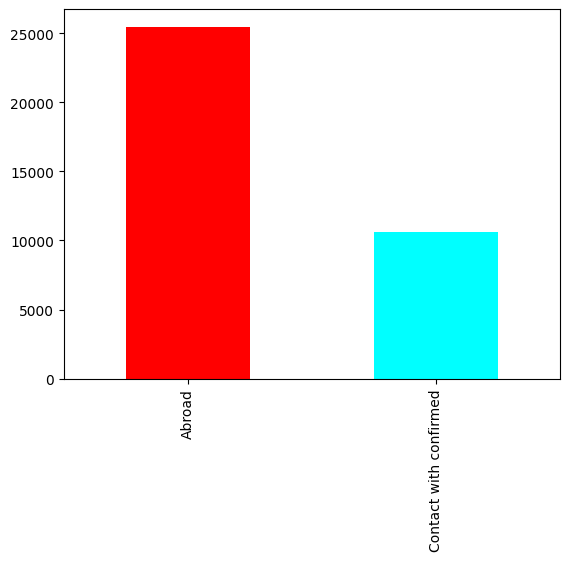

In [ ]:
cont["Known_contact"].value_counts().plot(kind = "bar",color = ["red","cyan"])

In [ ]:
cont.groupby("Known_contact")["Corona"].value_counts().unstack()

Corona,negative,other,positive
Known_contact,,,
Abroad,23205,394,1869
Contact with confirmed,3160,161,7318


In [ ]:
pd.crosstab(df["Cough_symptoms"],df["Corona"])

Corona,negative,other,positive
Cough_symptoms,,,
False,225021,3235,8112
True,34987,657,6584
None,219,0,33


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df["Cough_symptoms"],df["Corona"]))

Chi2ContingencyResult(statistic=10656.809694286529, pvalue=0.0, dof=4, expected_freq=array([[2.20583743e+05, 3.29908859e+03, 1.24851685e+04],
       [3.94080853e+04, 5.89394136e+02, 2.23052061e+03],
       [2.35171864e+02, 3.51727106e+00, 1.33108647e+01]]))

In [ ]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

## Test_date

In [ ]:
date_df = df.copy()

In [ ]:
date_df["month_name"]=date_df["Test_date"].dt.month_name()

In [ ]:
neg_pos = date_df[date_df["Corona"].isin(["positive","negative"])]
res = neg_pos.groupby(["month_name"])["Corona"].value_counts()
#print(res)
res_uns = res.unstack()
#res_uns[["percen_pos"]] = res_uns[["positive"]]*100/res_uns[["negative"]]
res_uns

Corona,negative,positive
month_name,,
April,136596,4188
August,3746,274
December,6188,330
February,7492,615
January,7903,682
July,5414,483
June,4947,394
March,67273,6283
May,6946,505


<Axes: xlabel='month_name'>

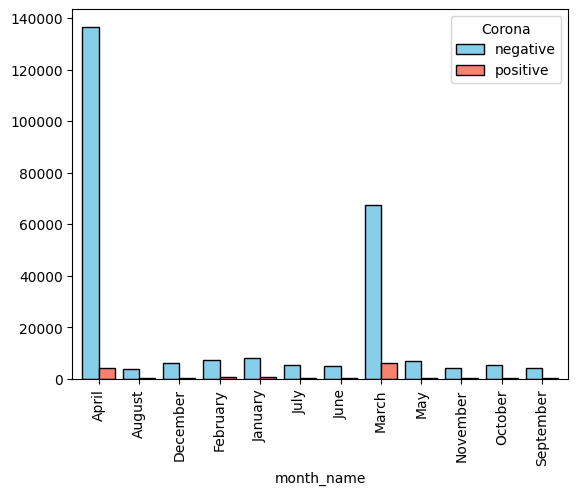

In [ ]:
res_uns.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black', width=0.8)


In [ ]:
pos = date_df[date_df["Corona"].isin(["positive"])]
pos1 = pos.groupby(["month_name"])["Corona"].count().reset_index().sort_values(by = "Corona",ascending = False)
#pos.groupby(["month_name"])["Corona"].count().reset_index()
px.bar(pos1,x = "month_name",y="Corona",color = "month_name")

# chi2

In [ ]:

chi_2 = []
p_value = []
for i in df.select_dtypes(include=["object"]).columns:
      t_stat,p,dof,ex = chi2_contingency(pd.crosstab(df["Corona"],df[i]))
      chi_2.append([i,t_stat])
      p_value.append([i,p])
      print(f"chi2 value for {i} : {t_stat}")
      print(f"p value fro {i}:{p}")
      print()
      print("**********************************")
      print()


chi2 value for Cough_symptoms : 10656.80969428653
p value fro Cough_symptoms:0.0

**********************************

chi2 value for Fever : 19500.93805863658
p value fro Fever:0.0

**********************************

chi2 value for Sore_throat : 21246.34794360921
p value fro Sore_throat:0.0

**********************************

chi2 value for Shortness_of_breath : 14927.275750462743
p value fro Shortness_of_breath:0.0

**********************************

chi2 value for Headache : 37139.0996751539
p value fro Headache:0.0

**********************************

chi2 value for Corona : 557696.0
p value fro Corona:0.0

**********************************

chi2 value for Age_60_above : 3559.7215545706613
p value fro Age_60_above:0.0

**********************************

chi2 value for Sex : 453.60951481507027
p value fro Sex:7.202913146151896e-97

**********************************

chi2 value for Known_contact : 90430.7306889701
p value fro Known_contact:0.0

**********************************

In [ ]:
pdf = pd.DataFrame(p_value)

In [ ]:
pdf

,0,1
0,Cough_symptoms,0.000000e+00
1,Fever,0.000000e+00
2,Sore_throat,0.000000e+00
3,Shortness_of_breath,0.000000e+00
4,Headache,0.000000e+00
5,Corona,0.000000e+00
6,Age_60_above,0.000000e+00
7,Sex,7.202913e-97
8,Known_contact,0.000000e+00


In [ ]:
pdf.rename(columns = {0:"col1",1:"p_value"},inplace = True)

In [ ]:
pdf

,col1,p_value
0,Cough_symptoms,0.000000e+00
1,Fever,0.000000e+00
2,Sore_throat,0.000000e+00
3,Shortness_of_breath,0.000000e+00
4,Headache,0.000000e+00
5,Corona,0.000000e+00
6,Age_60_above,0.000000e+00
7,Sex,7.202913e-97
8,Known_contact,0.000000e+00


In [ ]:
pdf[pdf["p_value"]>0.05]


,col1,p_value


In [ ]:
pdf["target"]="corona"

<Axes: xlabel='target', ylabel='col1'>

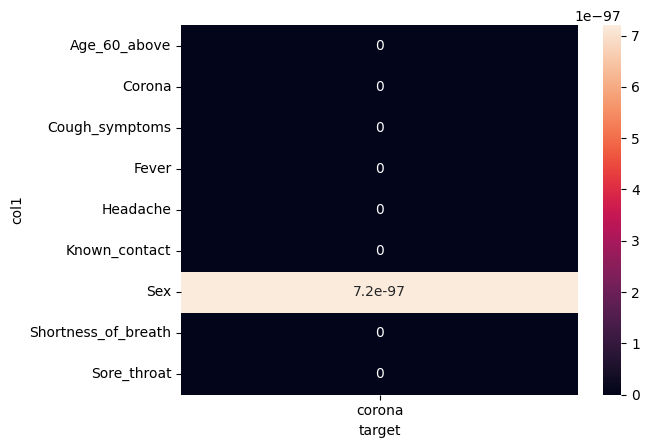

In [ ]:
sns.heatmap(pdf.pivot(index = "col1",columns = "target",values = "p_value"),annot = True)

## Feature Engineering

In [ ]:
date=df["Test_date"].dt.day
month=df["Test_date"].dt.month
year=df["Test_date"].dt.year


In [ ]:
df.insert(2,"test_date",date)
df.insert(3,"test_month",month)
df.insert(4,"test_year",year)

In [ ]:
df.drop(columns = ["Test_date"],inplace = True)

In [ ]:
df.head()

,Ind_ID,test_date,test_month,test_year,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,3,11,2020,True,False,True,False,False,negative,None,None,Abroad
1,2,3,11,2020,False,True,False,False,False,positive,None,None,Abroad
2,3,3,11,2020,False,True,False,False,False,positive,None,None,Abroad
3,4,3,11,2020,True,False,False,False,False,negative,None,None,Abroad
4,5,3,11,2020,True,False,False,False,False,negative,None,None,Contact with confirmed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   test_date            278848 non-null  int64 
 2   test_month           278848 non-null  int64 
 3   test_year            278848 non-null  int64 
 4   Cough_symptoms       278848 non-null  object
 5   Fever                278848 non-null  object
 6   Sore_throat          278848 non-null  object
 7   Shortness_of_breath  278848 non-null  object
 8   Headache             278848 non-null  object
 9   Corona               278848 non-null  object
 10  Age_60_above         278848 non-null  object
 11  Sex                  278848 non-null  object
 12  Known_contact        278848 non-null  object
dtypes: int64(4), object(9)
memory usage: 27.7+ MB


## Missing value imputation

In [ ]:
df["Corona"]=df["Corona"].replace("other",np.nan)
df["corona"]=df["Corona"].replace("other",np.nan)
df[df["Corona"]=="other"]

,Ind_ID,test_date,test_month,test_year,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,corona


In [ ]:
df["corona_imp"]=df["corona"]

In [ ]:
df["corona_imp"][df["corona_imp"].isnull()] = df["Corona"].dropna().sample(df["corona_imp"].isnull().sum()).values

<ipython-input-262-997973ae66b7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pd.concat([df["Corona"].value_counts()/len(df["Corona"].dropna()),

df["corona_imp"].value_counts()/len(df["corona_imp"])],axis = 1)

,Corona,corona_imp
negative,0.946431,0.946422
positive,0.053569,0.053578


In [ ]:
df["corona_imp"].isnull().sum()

0

In [ ]:
df["cough_imp"]=df["Cough_symptoms"]
df["cough_imp"][df["cough_imp"].isnull()] = df["Cough_symptoms"].dropna().sample(df["cough_imp"].isnull().sum()).values

<ipython-input-265-104efea26175>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df["cough_imp"]=df["cough_imp"].astype("bool")

In [ ]:
df["cough_imp"].value_counts()

False    236368
True      42480
Name: cough_imp, dtype: int64

In [ ]:
df=df.replace("None",np.nan)

In [ ]:
df["Fever_imp"]=df["Fever"]
df["Fever_imp"][df["Fever_imp"].isnull()] = df["Fever"].dropna().sample(df["Fever_imp"].isnull().sum()).values

<ipython-input-269-3693de6fbe1d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df["Fever_imp"]=df["Fever_imp"].astype("bool")

In [ ]:
df["Sore_throat_imp"]=df["Sore_throat"]
df["Sore_throat_imp"][df["Sore_throat_imp"].isnull()] = df["Sore_throat"].dropna().sample(df["Sore_throat_imp"].isnull().sum()).values

<ipython-input-271-2504565187e5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df["Sore_throat_imp"]=df["Sore_throat_imp"].astype("bool")

In [ ]:
df["Shortness_of_breath_imp"]=df["Shortness_of_breath"]
df["Shortness_of_breath_imp"][df["Shortness_of_breath_imp"].isnull()] = df["Shortness_of_breath"].dropna().sample(df["Shortness_of_breath_imp"].isnull().sum()).values

<ipython-input-273-981a57a6c311>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df["Shortness_of_breath_imp"]=df["Shortness_of_breath_imp"].astype("bool")

In [ ]:
df["Headache_imp"]=df["Headache"]
df["Headache_imp"][df["Headache_imp"].isnull()] = df["Headache"].dropna().sample(df["Headache_imp"].isnull().sum()).values

<ipython-input-275-23cef6b502d4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df["Headache_imp"]=df["Headache_imp"].astype("bool")

In [ ]:
df["Sex_imp"]=df["Sex"]
df["Sex_imp"][df["Sex_imp"].isnull()] = df["Sex"].dropna().sample(df["Sex_imp"].isnull().sum()).values

<ipython-input-277-ae6efcb682bc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Machine Learning approach

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False,drop = "first",handle_unknown = "ignore")

In [ ]:
ohe_c = ohe.fit_transform(df[["corona_imp"]],ohe.get_feature_names_out)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
df["positive"]=ohe_c

In [ ]:
df["positive"]=df["positive"].astype("int")

In [ ]:
df.head()

,Ind_ID,test_date,test_month,test_year,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,...,Known_contact,corona,corona_imp,cough_imp,Fever_imp,Sore_throat_imp,Shortness_of_breath_imp,Headache_imp,Sex_imp,positive
0,1,3,11,2020,True,False,True,False,False,negative,...,Abroad,negative,negative,True,False,True,False,False,male,0
1,2,3,11,2020,False,True,False,False,False,positive,...,Abroad,positive,positive,False,True,False,False,False,female,1
2,3,3,11,2020,False,True,False,False,False,positive,...,Abroad,positive,positive,False,True,False,False,False,male,1
3,4,3,11,2020,True,False,False,False,False,negative,...,Abroad,negative,negative,True,False,False,False,False,female,0
4,5,3,11,2020,True,False,False,False,False,negative,...,Contact with confirmed,negative,negative,True,False,False,False,False,female,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Ind_ID                   278848 non-null  int64 
 1   test_date                278848 non-null  int64 
 2   test_month               278848 non-null  int64 
 3   test_year                278848 non-null  int64 
 4   Cough_symptoms           278596 non-null  object
 5   Fever                    278596 non-null  object
 6   Sore_throat              278847 non-null  object
 7   Shortness_of_breath      278847 non-null  object
 8   Headache                 278847 non-null  object
 9   Corona                   274956 non-null  object
 10  Age_60_above             151528 non-null  object
 11  Sex                      259285 non-null  object
 12  Known_contact            278848 non-null  object
 13  corona                   274956 non-null  object
 14  corona_imp          

In [ ]:
x = df[["test_month","cough_imp","Fever_imp","Sore_throat_imp","Shortness_of_breath_imp","Headache_imp","Sex_imp","Known_contact"]]
y = df["positive"]

In [ ]:
x.head(3)

,test_month,cough_imp,Fever_imp,Sore_throat_imp,Shortness_of_breath_imp,Headache_imp,Sex_imp,Known_contact
0,11,True,False,True,False,False,male,Abroad
1,11,False,True,False,False,False,female,Abroad
2,11,False,True,False,False,False,male,Abroad


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state=2)

In [ ]:
X_train

,test_month,cough_imp,Fever_imp,Sore_throat_imp,Shortness_of_breath_imp,Headache_imp,Sex_imp,Known_contact
95011,4,False,False,False,False,False,female,Other
149262,4,False,False,False,False,False,female,Other
170331,4,False,False,False,False,False,female,Other
21499,3,False,False,False,False,False,female,Other
234876,4,False,False,False,False,False,female,Other
...,...,...,...,...,...,...,...,...
33867,3,False,False,False,False,False,female,Other
84434,3,False,False,False,False,False,male,Other
95816,4,False,False,False,False,False,male,Other
203245,4,True,False,False,False,False,female,Other


In [ ]:
X_train.isnull().sum()

test_month                 0
cough_imp                  0
Fever_imp                  0
Sore_throat_imp            0
Shortness_of_breath_imp    0
Headache_imp               0
Sex_imp                    0
Known_contact              0
dtype: int64

for i in X_train.select_dtypes(include = ["object"]).columns:
    ohe = OneHotEncoder(sparse = False,drop = "first",handle_unknown = "ignore")
    ohe_d = ohe.fit_transform(X_train[[i]])
    ohe_df = pd.DataFrame(ohe_d,columns = ohe.get_feature_names_out())
    X_train = pd.concat([X_train,ohe_df],axis = 1)
    X_train = X_train.drop(columns = [i])
    ohe_test = ohe.transform(X_test[[i]])
    ohe_test_df = pd.DataFrame(ohe_test,columns = ohe.get_feature_names_out())
    X_test = pd.concat([X_test,ohe_test_df],axis = 1)
    X_test = X_test.drop(columns = [i])

## OneHotEncode

In [ ]:
ohe1 = OneHotEncoder(sparse = False,drop = "first")
ohe_sex = ohe1.fit_transform(X_train["Sex_imp"].values.reshape(-1,1))
#ohe_sex_df = pd.DataFrame(ohe_sex,columns = ohe.get_feature_names_out())
X_train.insert(6,"sex",ohe_sex)
X_train.drop(columns = ["Sex_imp"],inplace = True)

ohe_test = ohe1.transform(X_test["Sex_imp"].values.reshape(-1,1))
#ohe_test_df = pd.DataFrame(ohe_test,columns = ohe.get_feature_names_out())
X_test.insert(6,"sex",ohe_test)
X_test.drop(columns = ["Sex_imp"],inplace = True)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("trf",OneHotEncoder(sparse = False,handle_unknown="ignore"),["Known_contact"])],remainder = "passthrough")


In [ ]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
X_train

array([[0.0, 0.0, 1.0, ..., False, False, 0.0],
       [0.0, 0.0, 1.0, ..., False, False, 0.0],
       [0.0, 0.0, 1.0, ..., False, False, 0.0],
       ...,
       [0.0, 0.0, 1.0, ..., False, False, 1.0],
       [0.0, 0.0, 1.0, ..., False, False, 0.0],
       [0.0, 1.0, 0.0, ..., False, False, 0.0]], dtype=object)

In [ ]:
X_test

array([[0.0, 0.0, 1.0, ..., False, False, 1.0],
       [0.0, 0.0, 1.0, ..., False, False, 1.0],
       [0.0, 0.0, 1.0, ..., False, False, 1.0],
       ...,
       [0.0, 0.0, 1.0, ..., False, False, 1.0],
       [0.0, 0.0, 1.0, ..., False, False, 0.0],
       [0.0, 0.0, 1.0, ..., False, False, 1.0]], dtype=object)

In [ ]:
x.head(3)

,test_month,cough_imp,Fever_imp,Sore_throat_imp,Shortness_of_breath_imp,Headache_imp,Sex_imp,Known_contact
0,11,True,False,True,False,False,male,Abroad
1,11,False,True,False,False,False,female,Abroad
2,11,False,True,False,False,False,male,Abroad


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   test_month               278848 non-null  int64 
 1   cough_imp                278848 non-null  bool  
 2   Fever_imp                278848 non-null  bool  
 3   Sore_throat_imp          278848 non-null  bool  
 4   Shortness_of_breath_imp  278848 non-null  bool  
 5   Headache_imp             278848 non-null  bool  
 6   Sex_imp                  278848 non-null  object
 7   Known_contact            278848 non-null  object
dtypes: bool(5), int64(1), object(2)
memory usage: 7.7+ MB


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [ ]:
log.fit(X_train,y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
accuracy_score(y_test,log.predict(X_test))

0.9660211583288506

In [ ]:
print(log.score(X_train,y_train))

0.9654380978850446


In [ ]:
y_prob = log.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [ ]:
fpr, tpr, threshold=roc_curve(y_test,y_prob)

In [ ]:
l=[]
p = []
for i in threshold:
    y_pred = np.where(y_prob>i,1,0)
    accu = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    l.append(accu)
    p.append(prec)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
thres_acc = pd.DataFrame({"thres":threshold,"accu":l,"prec":prec})

In [ ]:
thres_acc.sort_values(by ="prec",ascending=False)

,thres,accu,prec
0,1.999989,0.946961,0.053464
381,0.123873,0.958401,0.053464
375,0.140279,0.966039,0.053464
376,0.132201,0.963923,0.053464
377,0.131860,0.963905,0.053464
...,...,...,...
183,0.815046,0.958723,0.053464
182,0.815124,0.958741,0.053464
181,0.815584,0.958723,0.053464
180,0.816650,0.958759,0.053464


In [ ]:
auc(fpr, tpr)

0.8739394460926551

In [ ]:
y_pred=np.where(y_prob>0.23,1,0)

In [ ]:
accuracy_score(y_test,y_pred)

0.9663618432849203

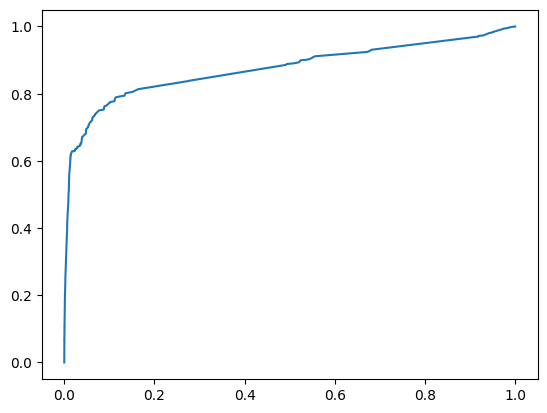

In [ ]:
plt.plot(fpr,tpr)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,log.predict(X_test))

array([[52250,   562],
       [ 1333,  1625]])

In [ ]:
y_pred = log.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52812
           1       0.74      0.55      0.63      2958

    accuracy                           0.97     55770
   macro avg       0.86      0.77      0.81     55770
weighted avg       0.96      0.97      0.96     55770



## upsampling


In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
sm=SMOTE(random_state = 13)
rs = RandomOverSampler(random_state = 12)
x_samp,y_samp = sm.fit_resample(X_train,y_train)
x_ran,y_ran = rs.fit_resample(X_train,y_train)

In [ ]:
log2 = LogisticRegression()
log2.fit(x_samp,y_samp)

LogisticRegression()

In [ ]:
y_pred = log2.predict(X_test)

In [ ]:
print("training score",log2.score(x_samp,y_samp))
print("accuracy score :",accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))

training score 0.8321000871641339
accuracy score : 0.9219831450600682

[[49265  3547]
 [  804  2154]]


## random_sample

In [ ]:
log3 = LogisticRegression()
log3.fit(x_ran,y_ran)

LogisticRegression()

In [ ]:
y_pred = log3.predict(X_test)

In [ ]:
print("training score",log3.score(x_samp,y_samp))
print("accuracy score :",accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

training score 0.8324909046121196
accuracy score : 0.9220010758472297

[[49264  3548]
 [  802  2156]]


              precision    recall  f1-score   support

           0       0.98      0.93      0.96     52812
           1       0.38      0.73      0.50      2958

    accuracy                           0.92     55770
   macro avg       0.68      0.83      0.73     55770
weighted avg       0.95      0.92      0.93     55770



## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred1=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9220010758472297

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     52812
           1       0.38      0.73      0.50      2958

    accuracy                           0.92     55770
   macro avg       0.68      0.83      0.73     55770
weighted avg       0.95      0.92      0.93     55770



## Sampling

In [ ]:
dt1 = DecisionTreeClassifier(max_depth = 5)
dt1.fit(x_samp,y_samp)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = dt1.predict(X_test)

In [ ]:
print("training score",dt1.score(x_samp,y_samp))
print("accuracy score :",accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))

training score 0.8522852162049495
accuracy score : 0.9160121929352698

[[48789  4023]
 [  661  2297]]


## Randomsapmling

In [ ]:
dt2 = DecisionTreeClassifier(max_depth = 5)
dt2.fit(x_ran,y_ran)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = dt2.predict(X_test)

In [ ]:
print("training score",dt2.score(x_samp,y_samp))
print("accuracy score :",accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

training score 0.8504803501724334
accuracy score : 0.9160121929352698

[[48789  4023]
 [  661  2297]]


              precision    recall  f1-score   support

           0       0.99      0.92      0.95     52812
           1       0.36      0.78      0.50      2958

    accuracy                           0.92     55770
   macro avg       0.68      0.85      0.72     55770
weighted avg       0.95      0.92      0.93     55770



# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,max_depth =5)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_pred2 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9160121929352698

## sampling

In [ ]:
rf1 = RandomForestClassifier(n_estimators = 100,max_depth = 5)
rf1.fit(x_samp,y_samp)

RandomForestClassifier(max_depth=5)

In [ ]:
y_pred = rf1.predict(X_test)

In [ ]:
print("training score",rf1.score(x_samp,y_samp))
print("accuracy score :",accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))

training score 0.8585027665138136
accuracy score : 0.9165859781244396

[[48790  4022]
 [  630  2328]]


## oversampling

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 100,max_depth = 5)
rf2.fit(x_ran,y_ran)

RandomForestClassifier(max_depth=5)

In [ ]:
y_pred = rf2.predict(X_test)

In [ ]:
print("training score",rf2.score(x_samp,y_samp))
print("accuracy score :",accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

training score 0.8557623071967256
accuracy score : 0.9183790568405953

[[48899  3913]
 [  639  2319]]


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     52812
           1       0.37      0.78      0.50      2958

    accuracy                           0.92     55770
   macro avg       0.68      0.85      0.73     55770
weighted avg       0.95      0.92      0.93     55770



In [ ]:
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators=[("log",log3),("dt",dt2),("rf",rf2)])

In [ ]:
vt.fit(x_samp,y_samp)

VotingClassifier(estimators=[('log', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('rf', RandomForestClassifier(max_depth=5))])

In [ ]:
y_predvt = vt.predict(X_test)

training score 0.8562786599461856
accuracy score : 0.9159763313609467

[[48762  4050]
 [  636  2322]]


              precision    recall  f1-score   support

           0       0.99      0.92      0.95     52812
           1       0.36      0.78      0.50      2958

    accuracy                           0.92     55770
   macro avg       0.68      0.85      0.73     55770
weighted avg       0.95      0.92      0.93     55770



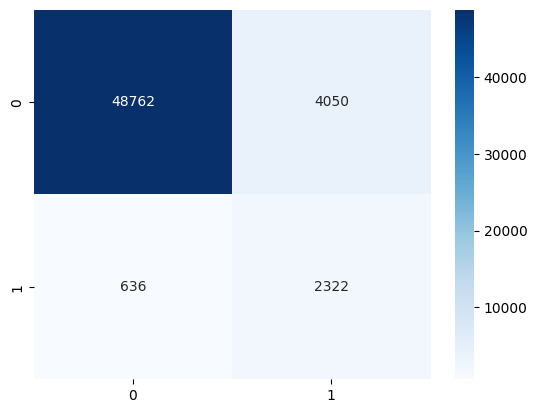

In [ ]:
print("training score",vt.score(x_samp,y_samp))
print("accuracy score :",accuracy_score(y_test,y_predvt))
print()
print(confusion_matrix(y_test,y_predvt))
cm = confusion_matrix(y_test,y_predvt)
sns.heatmap(cm,annot = True,fmt="d",cmap = "Blues")

print("\n")
print(classification_report(y_test,y_predvt))

Our hypothesis that logistic regression is effective for predicting is confirmed, with an accuracy score of 91%, highlighting its strong performance in our dataset. However, further research could explore optimization strategies for potential improvements.